# **Applied Statistics and Machine Learning: CA 1**

*   **Module owner**: Dr Shahram Azizi Sazi

*   **Module code**: B9BA102

*   **Submitted by**: Julien Blanchard

*   **Dataset**: we'll be working with the "Pokedex" dataset ([link here](https://www.kaggle.com/netzuel/pokmon-go-dataset-15-generations)) that I found on Kaggle. This dataset contains a good mixture of categorical and numerical values. It has to be cleaned first (see the *Cleaning our data and setting up some useful functions* for more details). According to Wikipedia Pokemon games have "*more than 368 million copies sold and one billion mobile downloads*". Both Nintendo and the Pokemon Company claim that "Legendary" Pokemons are harder to catch, stronger, and therefore more expensive. Do these Pokemons have their own specficities? Are they really better than ordinary Pokemons? Can a model identify the form (legendary, ordinary) of a Pokemon basing itself on its stats only?

*   **Pre-class preparation**: I purchased last December on Udemy a 43 hour long course entitled "*Complete Machine Learning and Data Science: Zero to Mastery*" ([link here](https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/)) and as of October 25th 2020 I have completed 63% of it. More recently in June, I followed and completed a Python exclusive, 6 hour long machine learning tutorial on Simplilearn's YouTube channel ([link here](hhttps://www.youtube.com/watch?v=9f-GarcDY58&ab_channel=Simplilearn)).

*   **References**: I have based myself on the following three books for this CA, and would highly recommend them ([picture here](https://drive.google.com/file/d/1AkdGRRexjC_sI9Wp1VUOzFO_cQwO2qo1/view?usp=sharing)):

> [Data Science from Scratch](https://www.amazon.co.uk/Data-Science-Scratch-Principles-Python-ebook/dp/B07QPC8RZX/ref=sr_1_6?dchild=1&keywords=python+for+data+science&qid=1605271670&sr=8-6) by Joel Grus

> [The Hundred-Page Machine Learning Book](https://www.amazon.co.uk/Hundred-Page-Machine-Learning-Book/dp/199957950X/ref=sr_1_1?dchild=1&keywords=one+hundred+page+machine&qid=1605271644&sr=8-1) by Andriy Burkov

> [Machine Learning Pocket Reference](https://www.amazon.co.uk/Machine-Learning-Pocket-Reference-Structured/dp/1492047546/ref=sr_1_1?crid=30BLWH1AB4DWP&dchild=1&keywords=machine+learning+pocket+reference&qid=1605271658&sprefix=machine+learning+pock%2Caps%2C214&sr=8-1) by Matt Harrison

*   **Python syntax and conventions**: All the variables in this Colab will be written following the same naming convention: "*my_variablename*". Whenever possible, I'll be defining functions. All these functions will be written following the same naming convention: "*make_actionname*".

# Loading our dataset and libraries

In [ ]:
# first we need to upload the csv file that we have saved locally
# you can find the file here of need be: https://docs.google.com/spreadsheets/d/e/2PACX-1vSfSg4N7HcMooSm4Ypf81ZH9BRLo9M44IQdCpb-36gmb7tR4TEnqk0NXSn7gxj016m77oooQW39dvxS/pubhtml
from google.colab import files
uploaded = files.upload()

Saving pokemon_go.csv to pokemon_go.csv


In [ ]:
# next, we're going to import our main modules, including IO, which will allow us to pass external files into Pandas
from matplotlib import pyplot as plt
from matplotlib import style as style
import numpy as np
import seaborn as sns
import altair as alt
from collections import Counter
import pandas as pd 
import io

In [ ]:
# creating our dataframe
df = pd.read_csv(io.BytesIO(uploaded['pokemon_go.csv']))

# Cleaning our data and setting up some useful functions

In [ ]:
# let's see what our dataframe currently looks like
df.head(2)

,Name,Pokedex,Stamina,Attack,Defense,Primary,Secondary,MaxHP,Capture_rate,Escape_rate,Weight,Height,Legendary,MaxCP,Generation
0,Bulbasaur,1,128,118,111,Grass,Poison,113,0.2,0.10,6.9,0.7,False,1115,1
1,Ivysaur,2,155,151,143,Grass,Poison,134,0.1,0.07,13.0,1.0,False,1699,1


In [ ]:
# before we can do anything with this dataset, we're going to have to clean some of its series:
# the inplace=True condition means that we're saving / updating all our changes in our dataframe

# our X serie (Legendary) is in boolean format, let's turn it into a string type instead
df['Form'] = df['Legendary'].apply(lambda x: 'Legendary' if x is True else 'Ordinary')
# we no longer need the boolean serie
df.drop(columns='Legendary', inplace=True)

In [ ]:
# setting up a useful counter function for easier plotting of categorical values
def make_count(serie, howmany):
  my_list1, my_list2 = [], []
  my_count = Counter(serie)
  for x,y in my_count.most_common(howmany):
    my_list1.append(x)
    my_list2.append(y)
  my_dict = {'labels': my_list1, 'values': my_list2}
  return my_dict

# testing it
my_test = make_count(df['Primary'], 5)
print(my_test)

{'labels': ['Water', 'Normal', 'Grass', 'Bug', 'Psychic'], 'values': [100, 89, 61, 60, 44]}


In [ ]:
# defining our matplotlib RcParams, optional but they make the plots look and feel better
rc = {
      'figure.figsize': (19,5),
      'axes.facecolor': 'white',
      'axes.edgecolor': 'white',
      'grid.color': 'white',
      'font.family': 'monospace',
      'font.size': 15
       }
plt.rcParams.update(rc)

In [ ]:
# building a side by side bar plot on Seaborn
def make_twobarcharts(x1,y1,x2,y2,my_title1,my_title2):
  fig = plt.figure(figsize=(19,5))
  plt.subplot(121)
  left = sns.barplot(x=x1, y=y1, orient='h', palette='Blues_r')
  sns.despine(left=True, right=True, top=True, bottom=True)
  plt.xlabel('')
  plt.ylabel('')
  left.set_title(my_title1)
  plt.subplot(122)
  right = sns.barplot(x=x2, y=y2, orient='h', palette='Blues_r')
  sns.despine(left=True, right=True, top=True, bottom=True)
  plt.xlabel('')
  plt.ylabel('')
  right.set_title(my_title2)
  plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
  plt.show()

In [ ]:
# building a side by side histogram plot on Seaborn
def make_twohistcharts(x1,x2,my_title1,my_title2):
  fig = plt.figure(figsize=(19,5))
  plt.subplot(121)
  left = sns.histplot(x1, kde=True, bins= 15, palette='Blues_r')
  sns.despine(left=True, right=True, top=True, bottom=True)
  plt.xlabel('')
  plt.ylabel('')
  left.set_title(my_title1)
  plt.subplot(122)
  right = sns.histplot(x2, kde=True, bins=15, palette='Blues_r')
  sns.despine(left=True, right=True, top=True, bottom=True)
  plt.xlabel('')
  plt.ylabel('')
  right.set_title(my_title2)
  plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
  plt.show()

In [ ]:
# building a side by side scatter plot on Seaborn
def make_twoscattercharts(x1,y1,x2,y2,my_title1,my_title2):
  fig = plt.figure(figsize=(19,5))
  plt.subplot(121)
  left = sns.scatterplot(x=x1, y=y1, palette='Blues_r', alpha=0.4, edgecolor='k', hue=df['Form'])
  sns.despine(left=True, right=True, top=True, bottom=True)
  plt.xlabel('')
  plt.ylabel('')
  left.set_title(my_title1)
  plt.subplot(122)
  right = sns.scatterplot(x=x2, y=y2, palette='Blues_r', alpha=0.4, edgecolor='k', hue=df['Form'])
  sns.despine(left=True, right=True, top=True, bottom=True)
  plt.xlabel('')
  plt.ylabel('')
  right.set_title(my_title2)
  plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
  plt.show()

# Question 1

> **Describe the dataset using appropriate plots / curves/ charts**



In [ ]:
# first, let's take a look at the first 2 rows of our dataset
df.head(2)

,Name,Pokedex,Stamina,Attack,Defense,Primary,Secondary,MaxHP,Capture_rate,Escape_rate,Weight,Height,MaxCP,Generation,Form
0,Bulbasaur,1,128,118,111,Grass,Poison,113,0.2,0.10,6.9,0.7,1115,1,Ordinary
1,Ivysaur,2,155,151,143,Grass,Poison,134,0.1,0.07,13.0,1.0,1699,1,Ordinary


In [ ]:
# we can also use the describe() function in Pandas, which provides some basis statistical insights 
df.describe(). round(2)

,Pokedex,Stamina,Attack,Defense,MaxHP,Capture_rate,Escape_rate,Weight,Height,MaxCP,Generation
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,325.00,168.87,161.15,140.76,144.85,0.24,0.08,57.49,1.15,1918.01,3.05
std,187.49,45.58,56.52,49.43,35.96,0.17,0.06,90.56,1.04,901.86,1.49
min,1.00,1.00,17.00,32.00,12.00,0.00,0.00,0.10,0.10,274.00,1.00
25%,163.00,137.00,118.00,100.00,120.00,0.10,0.06,10.10,0.60,1144.00,2.00
50%,325.00,163.00,159.00,137.00,140.00,0.20,0.07,29.00,1.00,1859.00,3.00
75%,487.00,190.00,204.00,175.00,162.00,0.30,0.10,61.00,1.40,2564.00,4.00
max,649.00,496.00,345.00,396.00,403.00,1.00,0.99,950.00,14.50,4431.00,5.00


So it seems we have 649 rows, and we can clearly see our **mean**, **standard deviation**, **top percentiles**: 25%, 50%, 75%
By default, it is important to note that the *describe()* function will only take into account numerical data.

Let's now take a look at our categorical values!

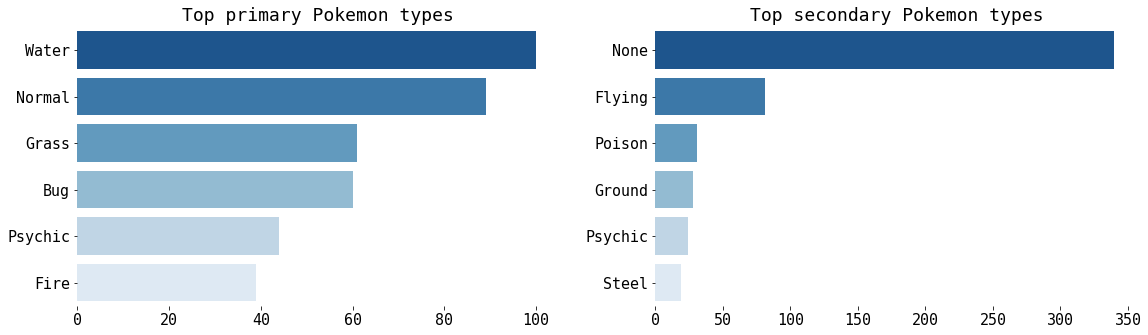

In [ ]:
# for categorical values, bar charts provide great insights. Using the double bar charts function that we defined earlier
my_title1, my_title2 = 'Top primary Pokemon types', 'Top secondary Pokemon types'
my_plot = make_count(df.Primary, 6)
my_plot2 = make_count(df.Secondary, 6)
x1, y1 = my_plot['values'], my_plot['labels']
x2, y2 = my_plot2['values'], my_plot2['labels']
# calling our function
make_twobarcharts(x1,y1,x2,y2,my_title1,my_title2)

Ok, that's interesting. Here is what we can see in our two bar charts above:
1.   All Pokemons have a **primary tag**
2.   However, only a few Pokemons seem to have a **secondary ability**. Could this mean that some Pokemons are specific stats or attributes that makes them different from the others? We'll be getting back to this later! :)

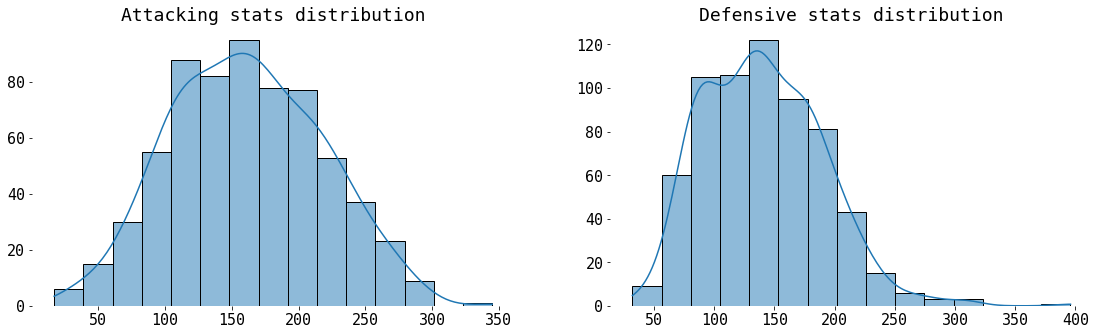

In [ ]:
# for numerical values, we're going to use distribution charts. Again, using a plotting function that I defined earlier
my_title1, my_title2 = 'Attacking stats distribution', 'Defensive stats distribution'
x1, x2 = df.Attack, df.Defense
# calling our function
make_twohistcharts(x1,x2,my_title1,my_title2)

Now, that's also quite interesting:
1.   Both attacking and defensive stats seem to present a normal, bell curved distribution
2.   The range seems quite similar: between 0 and 350
3.   However, we can see that there are more Pokemons with attacking stats above 200, than Pokemons with defensive stats above 200. That could mean that in combat, priority is given to aggressive tactics, and that users who attack first get a clear advantage.

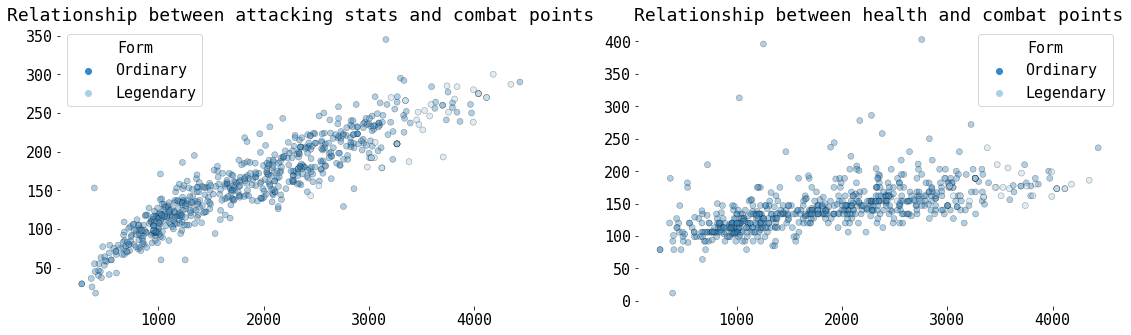

In [ ]:
# for correlated numerical values, scatter plots work best. Using the double scatter charts function that we defined earlier
my_title1, my_title2 = 'Relationship between attacking stats and combat points', 'Relationship between health and combat points'
x1, y1 = df['MaxCP'], df['Attack']
x2, y2 = df['MaxCP'], df['MaxHP']
# calling our function
make_twoscattercharts(x1,y1,x2,y2,my_title1,my_title2)

And how about these two scatter plots? The Pokemon Company and Nintendo both argue that "*there is more to winning a battle that just attacking*".

Well, from what we can see, **having strong Pokemons** (attacking stats + health points) is a key factor in battles.



> **Consider one of continuous attributes, and compute central and variational measures**

In [ ]:
# getting the mean value for the weight
my_mean = df.Weight.mean()

# getting the mode (or most common value) for the weight
my_mode = df.Weight.mode()

# Printing our results
print('The mean value for weight stats is', my_mean)
print('The mode (most common value) for weight stats is', my_mode)

The mean value for weight stats is 57.493374422187955
The mode (most common value) for weight stats is 0    15.0
1    30.0
dtype: float64


What do we have here? The mean (or average), which in other words is the sum divided by the count (I'm pretty crap at mathematics, so I hope I got this one correct). And the mode, which the most frequent value.

Please note that for increased readability we could add *.round()* and round our floats to the nearest decimal value.

In [ ]:
# now getting the range value (how spread our data is) for height this time
my_range = df.Height.max() - df.Height.min()

# and then the variance for health points
my_var = df.Height.var()

# Printing our results
print('The range for height is', my_range)
print('The variance for height is', my_var)

The range for height is 14.4
The variance for height is 1.0750350139816305


Next, I picked the range and the variance. The range is quite easy: it's the difference between the lowest and highest values. So, for instance, The highest temperature in Ireland in July might be 22 degrees, and the lowest 14. Then the range is 22 - 14 = 8.

As for the variance, this is a bit trickier (at least for me). The definition says "*the average of the squared differences from the Mean*" (that's not from me unfortunately). How Sharham explained it to us is: you take the difference betweem each value, you square this difference, and then average what you just calculated.

> **For a particular variable of the dataset, use Chebyshev's rule, and propose one-sigma interval. Based on your proposed interval, specify the outliers if any**

Note: a very interesting on sigma intervals can be found [here](https://news.mit.edu/2012/explained-sigma-0209)

I have to admit that it took me more than the class activities to understand this. For people like me who don't have a statistical background, what I find confusing is that different words can be used for similar concepts (a bit like in programing you would have the words double and float). From what I can understand, a "one sigma interval" means a one standard deviation interval. In other words:
1.   we get our mean
2.   We get our standard deviation
3.   We keep values that are between *mean() - sd(), and mean() + sd()*

In [ ]:
# a 1 sigma interval means 1 time standard deviation. For 2 times we could use *2 sd, etc..

# calculating the standard deviation for the health points
my_sd = df.MaxHP.std()

In [ ]:
# to show why this is important, we can now see who the most resistant Pokemons are, aka those above our mean + standard deviation
my_resistantpokemons_score = my_mean + my_sd
my_resistantpokemons = df[ (df.MaxHP > my_resistantpokemons_score)]

for x,y in enumerate(my_resistantpokemons.Name.sample(4)):
  print('Sample Pokemon %d:\n'%(x+1),y)

Sample Pokemon 1:
 Primeape
Sample Pokemon 2:
 Nidoqueen
Sample Pokemon 3:
 Pachirisu
Sample Pokemon 4:
 Misdreavus


In [ ]:
# back to the exercise, let's filter out our outliers
my_upperstd = df.MaxHP.mean() + df.MaxHP.std()
my_lowerstd = df.MaxHP.mean() - df.MaxHP.std()

# calling this sub-dataframe 'chebyshev', as some sort of tribute!
df_chebyshev = df[ (df['MaxHP'] < my_upperstd) & (df['MaxHP'] > my_lowerstd) ]

> **Explain how the box-plot technique can be used to detect outliers. Apply this technique for one attribute of the dataset** 

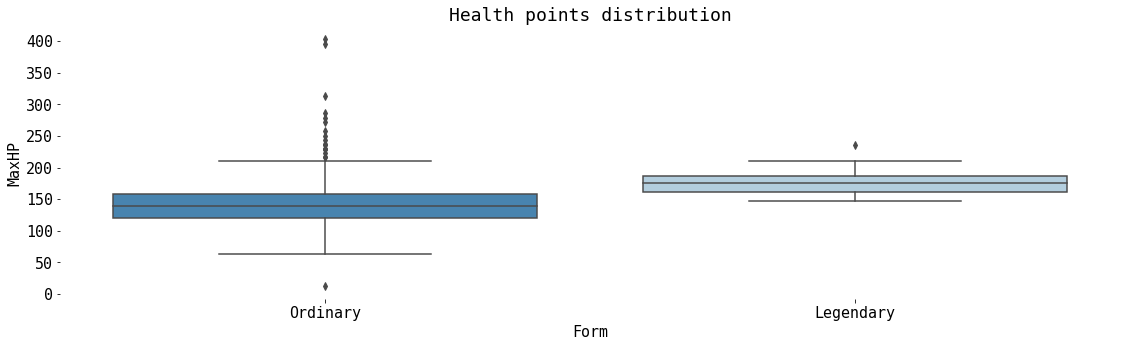

In [ ]:
# creating a box plot for our health points
plt.figure(figsize=(19,5))
ax = sns.boxplot(data=df, x='Form', y='MaxHP', orient='v', palette='Blues_r')
ax.set_title('Health points distribution')
sns.despine(left=True, right=True, top=True, bottom=True)
plt.show()

The box plot that we just created below is very interesting: we can immediately see that most Pokemons have between 50 and 100 health points (by the way, legendary Pokemons seem to have slightly more health points that ordinary Pokemons.

However, all the little dots we can see above the bulk of our box plots are outliers!

Using this visualisation type therefore makes it much easier to spot any outlying value.

By the way, I won't I won't be losing points for this, but I have to say that I find box plots particularly ugly. Alternatively, I much prefer violin plots, which serve the same purpose but look to me much nice. Anyway, this is all a matter of taste I guess.

# Question 2

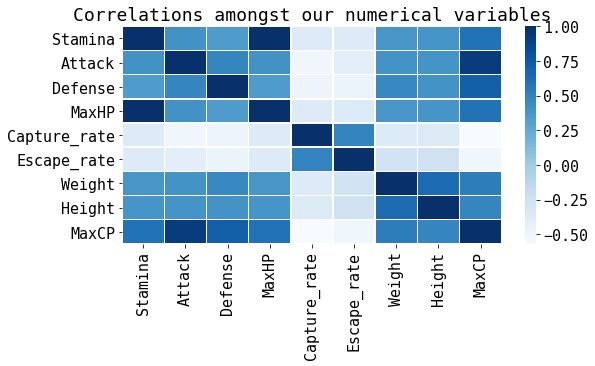

In [ ]:
# a good way to see what variables we should focus on, is to use a heatmap plot
df_model = df.loc[: , ['Stamina', 'Attack', 'Defense','MaxHP', 'Capture_rate', 'Escape_rate', 'Weight', 'Height', 'Form', 'MaxCP']]
my_corr = df_model.corr()

# plotting it
plt.figure(figsize=(8.5,4))
sns.heatmap(my_corr, cmap='Blues', linewidths=.5).set_title('Correlations amongst our numerical variables')
plt.show()

I know, I never got asked to visualise a heatmap plot. But I find that it gives a quick insights as to which values might be correlated with one another. It doesn't offer any more details of course, but I guess it gives some sort of "general overview".

In [ ]:
# and as a quick reminder this is what our dataset looks like
df.sample(2)

,Name,Pokedex,Stamina,Attack,Defense,Primary,Secondary,MaxHP,Capture_rate,Escape_rate,Weight,Height,MaxCP,Generation,Form
251,Treecko,252,120,124,94,Grass,None,106,0.20,0.10,5.0,0.51,1053,3,Ordinary
183,Azumarill,184,225,112,152,Water,Fairy,189,0.15,0.07,28.5,0.79,1588,2,Ordinary


> **Select four variables of the dataset, and propose an appropriate probability model to quantify uncertainty of each variable**

The 4 variables we are going to work with are:
*   "*Form*": this is value that I want to predict (y). It consists of 2 possible discrete values: 0,1 (Right now it shows "legendary", "ordinary" but we will have to convert this data to 0 and 1). But we are only interested in one value: "legendary" pokemons (value 1).

=> Discrete probability distribution (probability mass function): **Bernoulli** (as this is a boolean True / False prediction).

*   "*Capture_rate*": this is one of my X values. It is a continuous value, which expresses the chances of catchin a Pokemon.

=> Continuous probability distribution (probability density function): **Normal**

*   "*Generation*": this is another one of my X values. It is this time a discrete value, which expresses which generation a Pokemon belongs to. All values are positive, and are ranged between 1 and 5. This is very similar to the column ['carb'] in the *Mtcars* dataset.

=> Discrete probability distribution (probability mass function): **Binomial**

*   "*Escape_rate*": this is another one of my X values. It is again a continuous value, which expresses the eluding capacities of a Pokemon

=> Continuous probability distribution (probability density function): **Multinomial**

> **For each model in part (a), estimate the parameters of model** (we'll be treating this question and the next one together)

> **Express the way in which each model can be used for the predictive analytics, then find the prediction for each attribute**

In [ ]:
# to predict the legendary Pokemons in the column 'Form' we first have to encode our labels. Long story short, we can not
# do this with categorical data. As this column only contains two distinct values, we can replace them with 0 and 1
from sklearn.preprocessing import LabelEncoder
my_encoding = LabelEncoder()
df['Bernoulli'] = my_encoding.fit_transform(df['Form'])

# model using Bernoulli with parameters p (inspired from Shahram's code in R, as the Counter module in Python works like 'table; in R)
my_x = df.Bernoulli
my_tab = Counter(df.Bernoulli)
my_pred = my_tab[0]/len(my_x)
print('The probability to encounter a Legendary pokemon is', my_pred)

The probability to encounter a Legendary pokemon is 0.060092449922958396


In [ ]:
# for the 'Catch_rate' continuous column, we're going for normal distribution, using scipy's norm
from scipy.stats import norm
my_x = df.Capture_rate
my_mean = my_x.mean()
my_sigma = my_x.std()
my_pred = norm.rvs(size=len(my_x), loc=my_mean, scale=my_sigma)

#showing the first 10 results only, otherwise it takes quite a bit of space
print(my_pred[:10])

[0.40427315 0.24012192 0.37568369 0.28946542 0.29842371 0.05005761
 0.23144074 0.39464542 0.13121898 0.04588746]


In [ ]:
# now onto the 'Generation' column, which has discrete values from 1 to 5, so Binomial model
my_n = max(df.Generation)
my_phat = sum(df.Generation) / (my_n * len(df.Generation))
print('The probability of connection of each node to the central system is', my_phat)

# finally showing the first 10 predictions, taking inspiration from your video on R :)
from scipy.stats import binom
print(binom.rvs(my_n, my_phat, size=1000)[:10])

The probability of connection of each node to the central system is 0.6104776579352851
[3 3 2 3 2 5 2 4 5 5]


In [ ]:
# finally, multinomial model for the last column, 'Escape_rate' which is made of continuous values
my_x = df.Escape_rate
my_mean = my_x.mean()
my_sigma = my_x.std()
my_pred = norm.rvs(size=len(my_x), loc=my_mean, scale=my_sigma)

#showing the first 10 results, otherwise it takes quite a bit of space
print(my_pred[:10])

[ 0.0205046   0.13675199  0.08797067 -0.00103585  0.0705428  -0.01098596
  0.12071871  0.12048389  0.12073196  0.03018878]


I will be very honest: this part is by far the most difficult for me. Getting what I want in Python isn't an issue (I'm not saying I'm good, but just that I can things done). However, I do not have a statistical mindset.

The [official documentation for Scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) is really good I have to say, and has helped me a lot. You can see on the right side a table of content with different models for all sorts of values. I spent an entire afternoon on their website, and got a bit more into stats.

What I understand from here is that depending on the type of values we have, we are using an ensemble of statistical models to predict an outcome.

The problem I have is, this is the only part in this CA where I had to really look at Shahram's code, chunk it into several bits, and try to understand how it aligned against the slides he shared with us, and do some research on the internet. Not to steal any code, but simply to understand what I was doing, and why I was doing it.

I purchased [this book](https://www.amazon.co.uk/Practical-Statistics-Data-Scientists-Essential/dp/149207294X/ref=sr_1_5?dchild=1&keywords=statistics&qid=1605218416&sr=8-5) in early October, but I'm finding it really difficult to follow at the moment. I will continue though and try to improve, as this is quite interesting!

# Question 3

> **Suggest an appropriate GLM to model ouput to input variables**

As we want to stay close to the example used in class (the famous "Iris" dataset), we're going to go for a classification model, trying to use Pokemons attributes / stats to determine their form ("legendary" or "ordinary"). Our main options are:

*   Multiple linear regression
*   Random forest
*   Support vector machine
*   Neural networks

I found a great article [here](https://www.edureka.co/blog/classification-algorithms/) (on Edureka), and I will be going for a random forest model. The reason for this is quite simple:

*   My dataset is rather small, and we'll only be using 4 columns / series to predict a binary output. The main recommended models for this type of dataset are random forest and support vector machine.
*   I have already used a support vector machine model when predicting the same dataset in R. So, we're going to go for random forest this time, and compare our results!


> **Split the dataset into 80% as a trainset and 20% testset, then model the trainset by fitting your proposed GLM**

In [ ]:
# first let's import our ML libraries. We'll be using Scikit-Learn
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# as a reminder, our dataset looks like this
df.head(2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Name,Pokedex,Stamina,Attack,Defense,Primary,Secondary,MaxHP,Capture_rate,Escape_rate,Weight,Height,MaxCP,Generation,Form,Bernoulli
0,Bulbasaur,1,128,118,111,Grass,Poison,113,0.2,0.10,6.9,0.7,1115,1,Ordinary,1
1,Ivysaur,2,155,151,143,Grass,Poison,134,0.1,0.07,13.0,1.0,1699,1,Ordinary,1


In [ ]:
# let's now create a sub dataframe for our numerical input X values, and our categorical y output value 
df_model = df.loc[: , ['Stamina', 'Attack', 'Defense','MaxHP', 'Capture_rate', 'Escape_rate', 'Weight', 'Height', 'Form', 'MaxCP']]

"""
In the 2 Udemy courses I took, the first thing we did was to encode our categorical y data
For this, we can either use LabelEncoder() or OneHotEncoder from ScikitLearn
There's a lot more information on those techniques here https://pbpython.com/categorical-encoding.html
"""

# transforming our Quality column into numerical values, just like we did a few cells above
my_encoding = LabelEncoder()
df_model['Form'] = my_encoding.fit_transform(df_model['Form'])

# making sure it worked
df_model['Form'].value_counts()

1    610
0     39
Name: Form, dtype: int64

In [ ]:
"""
In the 2 course I just mentioned, we then separated our X and y variables
This is confirmed in The Machine Learning Pocket Guide, in the chapter dedicated to pre-processing
# https://www.amazon.co.uk/Machine-Learning-Pocket-Reference-Structured/dp/1492047546/ref=sr_1_2?dchild=1&keywords=machine+learning+pocket&qid=1605218981&sr=8-2
"""
# now separating the dataset as response variable and feature variable (always capital X, minor y)
X = df_model.drop('Form', axis=1) # we take all our columns except Output
y = df_model['Form']

In [ ]:
"""
Finally, we can split our training and testing data. 
The 0.2 value for test_size means 20%
Why did I pick a value of 42 for our random_state? Because this is the officially recommended value
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""
# splitting our data into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
"""
The next very important step is to scale our data. We do this because ML models can be biased towards
higher values. Example: imagine we have 2 columns. One ranges from 0 to 8, the other one from 0 to 500
Our model might be biased towards giving more importance to the second column
Scaling means that all our data will now be between a -1 and 1 range
More on this here: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
"""
# scaling our data for optimised results
my_standscal = StandardScaler()
X_train = my_standscal.fit_transform(X_train)
X_test = my_standscal.transform(X_test)

In [ ]:
# showing the first 5 scaled data, to illustrate what I wrote above
X_train[:5]

array([[-0.87050571, -1.48355358, -0.16877158, -0.85967029,  1.45009092,
         0.25749361, -0.61145175, -0.68934992, -1.20033838],
       [ 0.07809461, -0.76264614, -0.41453014,  0.06944969,  0.02114509,
        -0.25322938, -0.40931873, -0.33058381, -0.66200153],
       [-0.67647383, -0.09448803,  0.01554735, -0.66838088,  1.45009092,
         0.08725261, -0.50070866, -0.5053673 , -0.30126033],
       [-0.28841006, -0.99122655, -0.98796679, -0.28580207,  0.87851259,
         0.08725261, -0.36631171, -0.33978294, -1.00276321],
       [ 1.39319961,  1.80448765, -0.53740942,  1.38114849, -0.8362224 ,
        -0.25322938,  0.37448429,  0.12937275,  1.3315098 ]])

> **Specify the significant variables on the output variable at the level of 𝛼=0.05 and explore the related hypotheses test. Estimate the parameters of your model.**

In [ ]:
# we take our output y, our input X, and we choose a family (here binomial).
my_model = sm.GLM(y, X, family=sm.families.Binomial())
my_results = my_model.fit()
print(my_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Form   No. Observations:                  649
Model:                            GLM   Df Residuals:                      640
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 12 Nov 2020   Deviance:                          nan
Time:                        22:17:09   Pearson chi2:                     186.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Stamina         -0.7687      0.507     -1.515   

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: invalid value encountered in add
  n * np.log(1 - mu)) * var_weights


Ok, this is really interesting. I had never heard of generalized linear models before starting Shahram's classes!

I found about Statsmodel in my [Machine Learning Pocket Reference](https://www.amazon.co.uk/Machine-Learning-Pocket-Reference-Structured/dp/1492047546), and then got more familiar with how it works through their website. What I found a bit confusing, is that they used some very cryptic terms like [Endog / Exog](https://www.statsmodels.org/stable/endog_exog.html) to actually refer to y and X.

Anyway, **the significant variables on the output variable at the level of 𝛼=0.05** seem to be:
*   Attack: 0.0088
*   Defense: 0.0214
*   Weight: 0.0015
*   Height: 0.0168


> **Predict the output of the test dataset using the trained model. And provide the functional form of the optimal predictive model**

In [ ]:
"""
This is the easiest part, and it'll only take a few lines of code. When we use different models at a later stage,
we'll keep things as easy as this
To be completely transparent, I followed the official guidelines that can be found here
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
"""
# building our random forest classifier, using the following 3 steps: calling the model, fitting the model, predicting the model
my_randforest = RandomForestClassifier(n_estimators= 200)
my_randforest.fit(X_train, y_train) # using the TRAIN data
my_predrandforest = my_randforest.predict(X_test) # using the TEST data this time

In [ ]:
"""
This is the result of our TRAIN data.
Why is it showing as 0 or 1 and not 'legendary' and 'ordinary'? Because we encoded our data
earlier on using LabelEncoder()
"""
# showing the result
my_predrandforest[:5]

array([1, 1, 1, 1, 1])

> **Propose the appropriate measure of performance to evaluate the model and compute it for your derived model**

In [ ]:
"""
How do we see how our model performed?
When I imported our Scikit Learn libraries earlier, I added the following 2 modules:
classification_report, confusion_matrix
How they work: they compare 2 arguments: the results of our TEST data + the results of our TRAIN data
I found some very clear explanations on how to interpret the report here
https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn
"""
# seeing how the model performed
print( classification_report(y_test, my_predrandforest) )
print( confusion_matrix(y_test, my_predrandforest) )

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.98      0.99      0.98       122

    accuracy                           0.97       130
   macro avg       0.90      0.81      0.85       130
weighted avg       0.97      0.97      0.97       130

[[  5   3]
 [  1 121]]


Right, so our accuracy score is 97%

Before we dig into the results, the initial question we tried to answer was: "*is this Pokemon a legendary Pokemon or not?*"

What we can now see here are our precision and recall scores:
*   **Precision**: measures how accurate our positive predictions were
*   **Recall**: measures what fraction of the positives our model identified
*   **f1**: combines precision and recall

These scores are frequently referred to as the *harmonic mean* of precision and recall, and I found the [following article](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397) really interesting.

# Extra: trying other classifiers

We can now repeat the exact same exercise, using different classifiers.

As we have already pre-processed our data (encoding, scaling, test/train splitting), using different classifiers will only take a few extra lines of code.

Here are the classifications sets I have chosen:

1.   [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html): good news, no parameters are required :)
2.   [Multi-layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) (neural network): two important parameters are required: the number of columns (layers) in our X dataset. I had an error message trying to run the classifier without specifying the number of max_iter, so I added in the default value (200)

**Note**: I have made no adjustment to any of these models, and just followed the general instructions on Scikit Learn's home page. There must be many ways to improve the accuracy of these models, adding in extra parameters.

In [ ]:
"""
Starting with a support vector machine model
Why? Because that's what I used in R
"""

# building our svm model, using the same 3 steps again: calling the model, fitting the model, predicting the model
my_supportvectorm = svm.SVC()
my_supportvectorm.fit(X_train, y_train)
my_predsupportvectorm = my_supportvectorm.predict(X_test)

In [ ]:
# and just like before, we can see how this model performed
print( classification_report(y_test, my_predsupportvectorm) )
print( confusion_matrix(y_test, my_predsupportvectorm) )

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.96      0.97      0.96       122

    accuracy                           0.93       130
   macro avg       0.69      0.67      0.68       130
weighted avg       0.93      0.93      0.93       130

[[  3   5]
 [  4 118]]


In [ ]:
# building our neural network model
my_neuralnetw = MLPClassifier(hidden_layer_sizes=(9,9,9), max_iter=200) # I picked 6 layers because we have 6 columns as X features
my_neuralnetw.fit(X_train, y_train)
my_predneuralnetw = my_neuralnetw.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# and for the last time, we can see how this new model performed
print( classification_report(y_test, my_predneuralnetw) )
print( confusion_matrix(y_test, my_predneuralnetw) )

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.97      0.96      0.97       122

    accuracy                           0.94       130
   macro avg       0.74      0.79      0.76       130
weighted avg       0.95      0.94      0.94       130

[[  5   3]
 [  5 117]]


It's interesting to see that my Random Forest, SVM, and Neural Networks classifiers returned slightly different accuracy scores.

A next step for me would be to learn how to tune these models, how to dig into some lower level parameters and try to improve the score by adjusting some of the in-built functions.

One thing I am looking forward to doing over the next semesters, are Time Series predictions. More specifically I have been hearing about LSTM models for a while (using Keras) and I'm very excited to start seeing how they work.

# **Conclusion**: 

I hope you enjoyed following this Colab as much as I did writing it! Thank you for your time and your patience :)